# Neural Networks on Fashion MNIST Dataset

## Objective
In this week's exercise, you will:
1. Utilize callback functions to monitor model's performance during training.
2. Experiment with different layer sizes to observe their effects on prediction accuracy and training speed.
3. Implement pixel value normalization to improve network training speed.
4. Construct a multilayer neural network to classify the Fashion MNIST image dataset.

---

## Step 1: Import Libraries
Let's start by importing the necessary libraries.


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import layers, models

---

## Step 2: Load and Preprocess the Data
We'll load the Fashion MNIST dataset and then normalize the pixel values.


In [3]:
# TODO Load the dataset using the fashion_mnist.load_data() function
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# TODO Normalize the pixel values to be in range 0..1
train_images = train_images / 255.0
test_images = test_images / 255.0


---

## Step 3: Visualize the Data
Display some samples from the dataset.


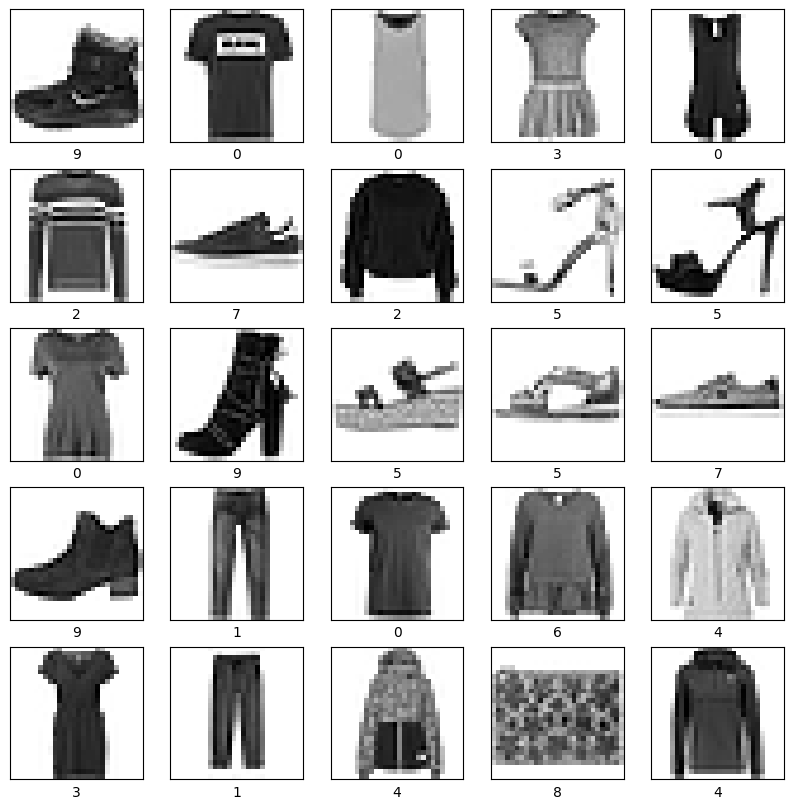

In [4]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

---

## Step 4: Define a Callback
Let's define a callback to monitor the model's accuracy during training.


In [5]:
# TODO define a callback that interrupts training after an accuracy of 90% is reached
class AccuracyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs_=()):
        if(logs_.get('accuracy')>0.9):
            print("\nReached 90% accuracy so cancelling training!")
            self.model.stop_training = True

accuracy_callback = AccuracyCallback()


---

## Step 5: Build a Neural Network
We will start with a simple neural network and then experiment with different layer sizes.


In [8]:
# TODO build an initial model (hint: you might need to flatten the input in the beginning)
model = models.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(128,activation='relu'),
    layers.Dense(10,activation='softmax')
])
# TODO compile your model, choose an optimizer, a loss function
# and a metric for measuring training performance
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


---

## Step 6: Train the Model
Train the model using the training data and your callback function.


In [9]:
model.fit(train_images,train_labels,epochs =5)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7819 - loss: 0.6290
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8635 - loss: 0.3832
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8774 - loss: 0.3394
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8847 - loss: 0.3161
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8936 - loss: 0.2905


---

## Step 7: Evaluate the Model
Evaluate the model using the test data.


In [10]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_accuracy*100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8701 - loss: 0.3601
Test accuracy: 87.08%


---

## Step 8: Experiment with Layer Sizes
Modify the neural network architecture by changing the layer sizes, and note the effects on training speed and prediction accuracy. You are encouraged to experiment with various configurations.


Epoch 1/5
1875/1875 - 10s - 5ms/step - accuracy: 0.8302 - loss: 0.4794 - val_accuracy: 0.8488 - val_loss: 0.4213
Epoch 2/5
1875/1875 - 9s - 5ms/step - accuracy: 0.8673 - loss: 0.3644 - val_accuracy: 0.8545 - val_loss: 0.3869
Epoch 3/5
1875/1875 - 10s - 5ms/step - accuracy: 0.8811 - loss: 0.3261 - val_accuracy: 0.8716 - val_loss: 0.3566
Epoch 4/5
1875/1875 - 9s - 5ms/step - accuracy: 0.8879 - loss: 0.3042 - val_accuracy: 0.8666 - val_loss: 0.3677
Epoch 5/5
1875/1875 - 9s - 5ms/step - accuracy: 0.8960 - loss: 0.2847 - val_accuracy: 0.8621 - val_loss: 0.3751


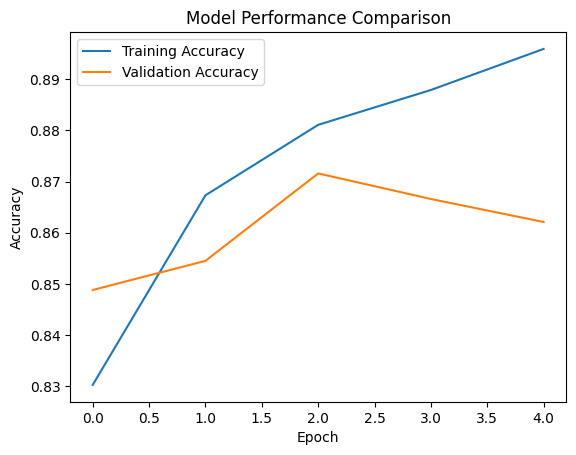

In [13]:
# larger hidden layer
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_images,
    train_labels,
    epochs=5,
    validation_data=(test_images, test_labels),
    verbose=2
)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Performance Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
